# Less informative priors

## Prelims

In [3]:
library(brms)

Loading required package: Rcpp

Loading 'brms' package (version 2.18.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar




In [1]:
N <- 100
M <- 2
K <- 4
J <- 3

mu <- 0
al <- matrix(c(-1, 1), ncol = 1)
Z <- matrix(rnorm(M*N, sd = .5), ncol = N)
ep_x <- matrix(rnorm(N, sd = 0.1), ncol = N)
X <- t(al) %*% Z + ep_x

U <- matrix(rnorm(K*N, sd = .2), ncol = N)
W <- sweep(U, 2, X, "+")

h_1 <- function(x) -x
h_2 <- function(x) 3*x
f <- function(x) 2*x
eta <- rnorm(N)
S <- f(X) + h_1(Z[1, ]) + h_2(Z[2, ]) + eta
S <- matrix(S, ncol = N)

beta0 <- matrix(rep(0, J*N), ncol = N)
beta1 <- matrix(rep(1, J), ncol = 1)
ep_y <- matrix(rnorm(J * N, sd = 0.1), ncol = N)
Y <- beta0 + beta1 %*% S + ep_y

In [3]:
data <- as.data.frame(t(rbind(Z,X,W,Y)))
names(data) <- c("Z1", "Z2", "X","W1", "W2", "W3", "W4", "Y1", "Y2", "Y3")

## Models

### No priors

In [7]:
data$Xm <- as.numeric(NA)
data$Sm <- as.numeric(NA)

bf2 <- bf(Sm|mi() ~ mi(Xm) + Z1 + Z2)
bf3 <- bf(Y1 ~ 0 + mi(Sm))
bf4 <- bf(Y2 ~ 0 + mi(Sm))
bf5 <- bf(Y3 ~ 0 + mi(Sm))
bf8 <- bf(Xm|mi() ~ Z1 + Z2)
bf9 <- bf(W1 ~ 0 + mi(Xm))
bf10 <- bf(W2 ~ 0 + mi(Xm))
bf11 <- bf(W3 ~ 0 + mi(Xm))
bf12 <- bf(W4 ~ 0 + mi(Xm))

model <- brm(bf2 + bf3 + bf4 + bf5 + bf8 + bf9 + bf10 + bf11 + bf12 +set_rescor(FALSE), data = data)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000142 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.42 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 6.776 seconds (Warm-up)
Chain 1:                24.958 seconds (Sampling)
Chain 1:                31

Warning message:
“There were 862 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 780 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 2.92, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
htt

In [8]:
prior_summary(model)

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,Sm,,,,,default
"student_t(3, 0, 2.5)",Intercept,,,Xm,,,,,default
,b,,,Sm,,,,,default
,b,Z1,,Sm,,,,,default
,b,Z2,,Sm,,,,,default
,b,miXm,,Sm,,,,,default
,b,,,W1,,,,,default
,b,miXm,,W1,,,,,default
,b,,,W2,,,,,default


### Correctly centered priors

In [9]:
priors <- c(
    prior(normal(-1, 1), class = b, coef = Z1, resp = Sm),
    prior(normal(3, 1), class = b, coef = Z2, resp = Sm),
    prior(normal(2, 1), class = b, coef = miXm, resp = Sm),
    prior(normal(1, 1), class = b, coef = miSm, resp = Y1),
    prior(normal(1, 1), class = b, coef = miSm, resp = Y2),
    prior(normal(1, 1), class = b, coef = miSm, resp = Y3),
    prior(normal(-1, 1), class = b, coef = Z1, resp = Xm),
    prior(normal(1, 1), class = b, coef = Z2, resp = Xm),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W1),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W2),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W3),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W4)
)

model <- brm(bf2 + bf3 + bf4 + bf5 + bf8 + bf9 + bf10 + bf11 + bf12 +set_rescor(FALSE), data = data, prior = priors)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000122 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.22 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 11.024 seconds (Warm-up)
Chain 1:                7.385 seconds (Sampling)
Chain 1:                18

Warning message:
“There were 129 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 1 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.62, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may

In [10]:
summary(model)$fixed

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 129 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sm_Intercept,-0.051176454,0.1291362825,-0.31569099,0.1980802,1.226376,12.595240,49.18442
Xm_Intercept,0.004275537,0.0153301463,-0.02552725,0.0344669,1.001972,2112.649297,3001.78206
Sm_Z1,-0.864779437,0.7089379960,-2.13522966,0.6163308,1.333793,9.575123,35.09732
Sm_Z2,1.821036833,1.7972927804,-1.78524295,4.1538373,1.553022,7.055393,27.10156
Xm_Z1,-0.960497845,0.0340394607,-1.02765340,-0.8937700,1.001514,2153.214937,2720.59764
Xm_Z2,1.031575932,0.0332068470,0.96512613,1.0952788,1.003602,2271.327266,2909.26288
Sm_miXm,0.792173213,1.9985651534,-3.25682105,3.4452662,1.556372,7.156645,26.16226
Y1_miSm,0.473533253,1.0872787637,-1.66860709,1.6944725,1.616238,6.967411,21.56706
Y2_miSm,0.471477611,1.0829089247,-1.66776680,1.6839533,1.617614,6.967865,21.77797


In [11]:
summary(model)$spec_pars

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 129 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma_Sm,0.97926321,0.25939314,0.57338333,1.6123593,1.132975,21.73399,92.13439
sigma_Y1,0.11659473,0.01212923,0.09408366,0.1422412,1.001587,2979.64313,2438.98627
sigma_Y2,0.10178270,0.01182131,0.07928913,0.1251110,1.002355,2562.66648,2388.59302
sigma_Y3,0.08775426,0.01246106,0.06262405,0.1128100,1.007619,1591.98555,1372.46623
sigma_Xm,0.10134799,0.01598088,0.06993310,0.1332400,1.013297,683.26105,872.95216
sigma_W1,0.21576309,0.01814650,0.18337760,0.2547764,1.001267,3528.03447,3030.24066
sigma_W2,0.23345647,0.01874677,0.19999254,0.2715658,1.000765,3333.45189,2781.83697
sigma_W3,0.19840992,0.01687496,0.16770822,0.2327931,1.001669,3319.06391,3262.70782
sigma_W4,0.19984374,0.01711905,0.16920315,0.2366620,1.000789,2978.72469,2732.30603


### Same, but running for longer

In [12]:
model <- brm(bf2 + bf3 + bf4 + bf5 + bf8 + bf9 + bf10 + bf11 + bf12 +set_rescor(FALSE), 
data = data, prior = priors, iter = 20000)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000114 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.14 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 20000 [  0%]  (Warmup)
Chain 1: Iteration:  2000 / 20000 [ 10%]  (Warmup)
Chain 1: Iteration:  4000 / 20000 [ 20%]  (Warmup)
Chain 1: Iteration:  6000 / 20000 [ 30%]  (Warmup)
Chain 1: Iteration:  8000 / 20000 [ 40%]  (Warmup)
Chain 1: Iteration: 10000 / 20000 [ 50%]  (Warmup)
Chain 1: Iteration: 10001 / 20000 [ 50%]  (Sampling)
Chain 1: Iteration: 12000 / 20000 [ 60%]  (Sampling)
Chain 1: Iteration: 14000 / 20000 [ 70%]  (Sampling)
Chain 1: Iteration: 16000 / 20000 [ 80%]  (Sampling)
Chain 1: Iteration: 18000 / 20000 [ 90%]  (Sampling)
Chain 1: Iteration: 20000 / 20000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 68.057 seconds (Warm-up)
Chain 1:                77.123 seconds (Sampling)
C

Warning message:
“There were 5483 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 1 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.95, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains 

In [13]:
summary(model)$fixed

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 5483 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sm_Intercept,0.017311086,1.117358e-01,-0.26125135,0.20146767,1.236625,11.859495,26.02411
Xm_Intercept,0.004630366,1.381449e-02,-0.02353274,0.03227765,1.062569,3716.351546,18819.72084
Sm_Z1,-0.439385750,6.969161e-01,-1.96445618,0.81093242,1.385396,8.461721,26.44791
Sm_Z2,0.172366290,1.780082e+00,-1.91337809,4.05333756,1.670315,6.303172,26.48033
Xm_Z1,-0.959924524,3.160507e-02,-1.02483928,-0.90086328,1.026982,106.599163,20262.48381
Xm_Z2,1.032616006,3.085808e-02,0.97190762,1.09535152,1.035784,1120.626353,7550.70792
Sm_miXm,-1.137070626,2.014812e+00,-3.25906500,3.24270184,1.560942,6.881655,27.58881
Y1_miSm,-0.915371025,1.103716e+00,-1.97224504,1.26106174,1.575742,6.965479,30.86166
Y2_miSm,-0.911683875,1.099257e+00,-1.96172064,1.25551579,1.576011,6.964638,31.15025


In [14]:
summary(model)$spec_pars

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 5483 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma_Sm,0.81402279,0.26987588,0.51548433,1.5288473,1.468182,7.815514,27.15622
sigma_Y1,0.12051818,0.01506686,0.09539978,0.1556817,1.256941,11.305064,31.08726
sigma_Y2,0.10424728,0.01269596,0.07983979,0.1264013,1.144316,17.712130,341.16257
sigma_Y3,0.08084155,0.02091598,0.03479177,0.1115667,1.311483,9.755595,13.20201
sigma_Xm,0.09625977,0.01652597,0.06678915,0.1295645,1.099844,24.857207,369.98223
sigma_W1,0.21592085,0.01696218,0.18468532,0.2520495,1.014484,689.351778,16935.06458
sigma_W2,0.23622019,0.01815003,0.20151937,0.2729723,1.038504,63.622997,23561.22157
sigma_W3,0.19944058,0.01592634,0.17016287,0.2341580,1.032445,1964.869887,12441.25886
sigma_W4,0.20032871,0.01599359,0.17025154,0.2337857,1.051130,932.283364,18477.58264


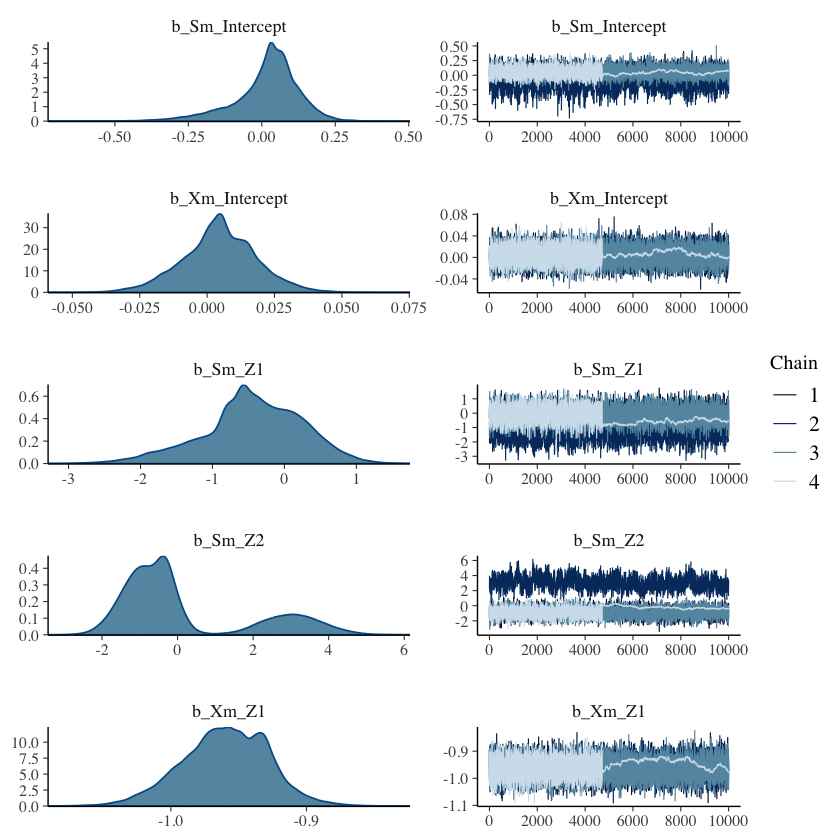

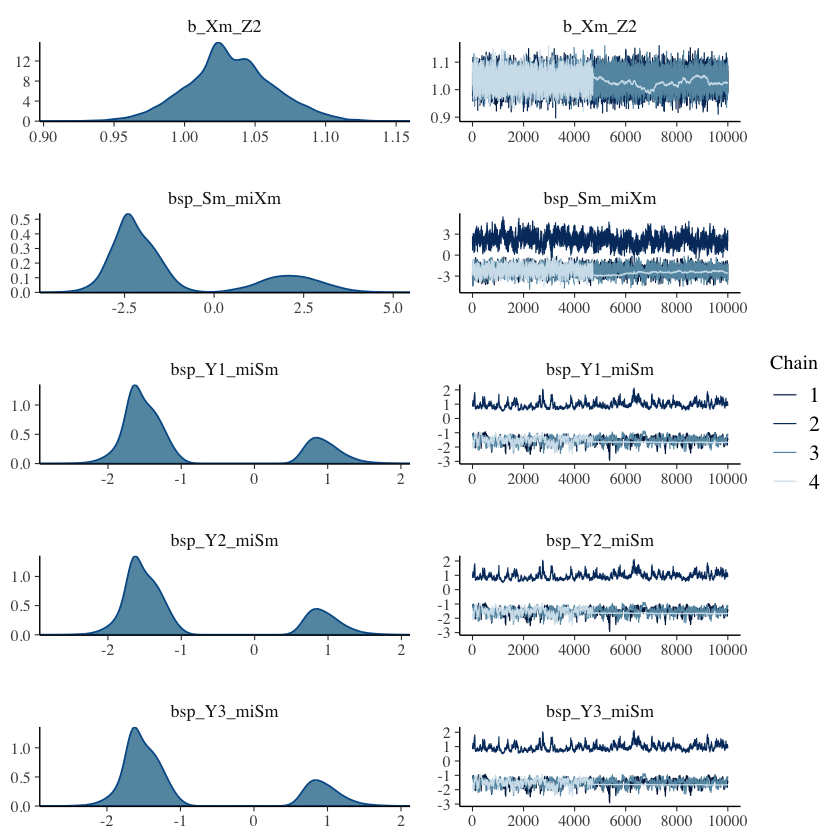

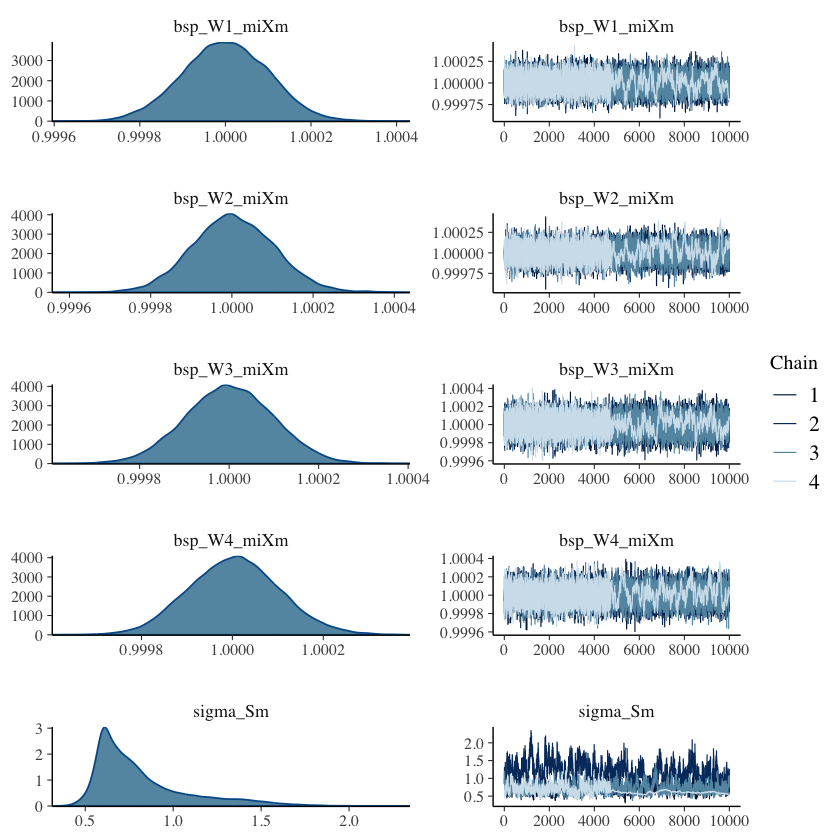

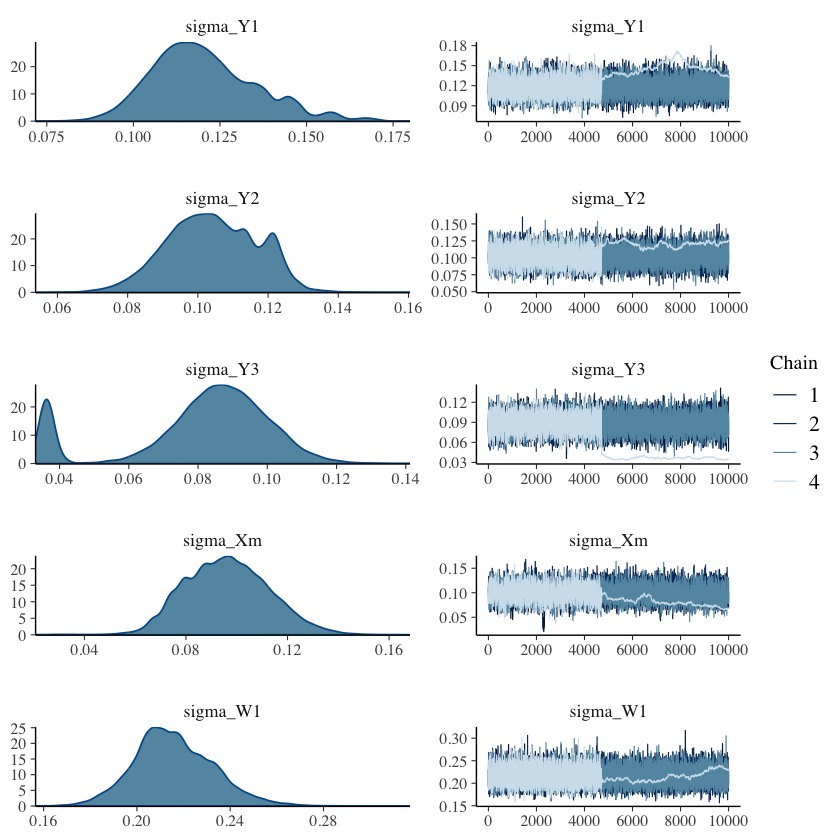

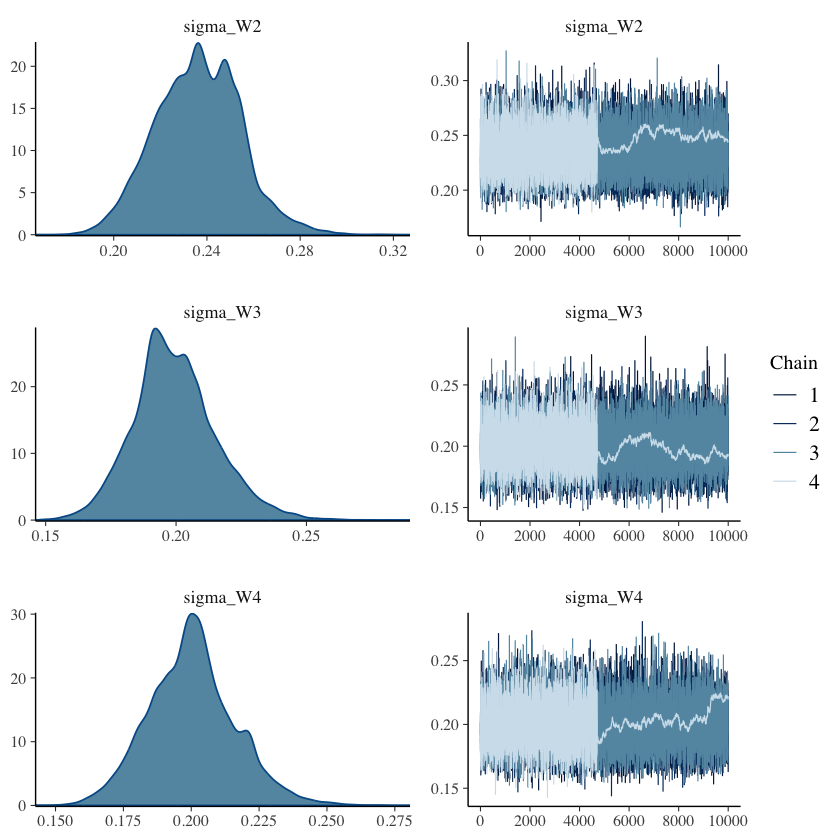

In [15]:
plot(model)

### Same, but larger sample size

In [4]:
N <- 1000
M <- 2
K <- 4
J <- 3

mu <- 0
al <- matrix(c(-1, 1), ncol = 1)
Z <- matrix(rnorm(M*N, sd = .5), ncol = N)
ep_x <- matrix(rnorm(N, sd = 0.1), ncol = N)
X <- t(al) %*% Z + ep_x

U <- matrix(rnorm(K*N, sd = .2), ncol = N)
W <- sweep(U, 2, X, "+")

h_1 <- function(x) -x
h_2 <- function(x) 3*x
f <- function(x) 2*x
eta <- rnorm(N)
S <- f(X) + h_1(Z[1, ]) + h_2(Z[2, ]) + eta
S <- matrix(S, ncol = N)

beta0 <- matrix(rep(0, J*N), ncol = N)
beta1 <- matrix(rep(1, J), ncol = 1)
ep_y <- matrix(rnorm(J * N, sd = 0.1), ncol = N)
Y <- beta0 + beta1 %*% S + ep_y

data <- as.data.frame(t(rbind(Z,X,W,Y)))
names(data) <- c("Z1", "Z2", "X","W1", "W2", "W3", "W4", "Y1", "Y2", "Y3")

data$Xm <- as.numeric(NA)
data$Sm <- as.numeric(NA)

In [6]:
bf2 <- bf(Sm|mi() ~ mi(Xm) + Z1 + Z2)
bf3 <- bf(Y1 ~ 0 + mi(Sm))
bf4 <- bf(Y2 ~ 0 + mi(Sm))
bf5 <- bf(Y3 ~ 0 + mi(Sm))
bf8 <- bf(Xm|mi() ~ Z1 + Z2)
bf9 <- bf(W1 ~ 0 + mi(Xm))
bf10 <- bf(W2 ~ 0 + mi(Xm))
bf11 <- bf(W3 ~ 0 + mi(Xm))
bf12 <- bf(W4 ~ 0 + mi(Xm))

In [7]:
priors <- c(
    prior(normal(-1, 1), class = b, coef = Z1, resp = Sm),
    prior(normal(3, 1), class = b, coef = Z2, resp = Sm),
    prior(normal(2, 1), class = b, coef = miXm, resp = Sm),
    prior(normal(1, 1), class = b, coef = miSm, resp = Y1),
    prior(normal(1, 1), class = b, coef = miSm, resp = Y2),
    prior(normal(1, 1), class = b, coef = miSm, resp = Y3),
    prior(normal(-1, 1), class = b, coef = Z1, resp = Xm),
    prior(normal(1, 1), class = b, coef = Z2, resp = Xm),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W1),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W2),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W3),
    prior(normal(1, 0.0001), class = b, coef = miXm, resp = W4)
)

In [8]:
model <- brm(bf2 + bf3 + bf4 + bf5 + bf8 + bf9 + bf10 + bf11 + bf12 +set_rescor(FALSE), 
data = data, prior = priors, iter = 2000)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000443 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 4.43 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 100.09 seconds (Warm-up)
Chain 1:                35.938 seconds (Sampling)
Chain 1:                1

Warning message:
“The largest R-hat is 3.36, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [9]:
summary(model)$fixed

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sm_Intercept,-0.000703914,2.227333e-02,-0.04421390,0.045445244,1.243623,11.914734,59.09223
Xm_Intercept,-0.007907024,4.586263e-03,-0.01689438,0.001110348,1.000715,2402.160437,3118.62832
Sm_Z1,-0.108221456,3.223591e-01,-0.74385947,0.468822232,1.474924,7.867607,42.26139
Sm_Z2,0.142991905,1.376580e+00,-1.71094662,2.129881580,2.505997,4.843587,23.56198
Xm_Z1,-0.992109580,9.514144e-03,-1.01021114,-0.972978997,1.000347,2395.913134,3071.55697
Xm_Z2,1.011063140,9.039339e-03,0.99283463,1.028910491,1.002128,2304.628178,2730.13383
Sm_miXm,-0.063332907,1.488913e+00,-2.18637577,1.926752265,2.571331,4.795823,28.94584
Y1_miSm,-0.050283462,1.886624e+00,-2.32409846,2.199669538,3.161466,4.507378,19.46536
Y2_miSm,-0.050434538,1.891869e+00,-2.32983767,2.205546482,3.158679,4.508364,21.42859


In [10]:
summary(model)$spec_pars

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma_Sm,0.54128379,0.107255808,0.40683280,0.70420692,2.6384929,4.721411,10.60008
sigma_Y1,0.10411145,0.003472220,0.09747605,0.11107629,1.0001796,1988.955557,2531.77568
sigma_Y2,0.09933717,0.003567396,0.09250775,0.10663561,1.0011038,1462.671478,2114.57600
sigma_Y3,0.09285115,0.003600905,0.08599835,0.09990424,1.0008493,1340.148968,2296.37816
sigma_Xm,0.10547311,0.004631392,0.09668654,0.11464215,1.0143899,820.083270,1259.61484
sigma_W1,0.20106353,0.005290689,0.19068547,0.21152726,1.0030644,3282.888700,2651.10641
sigma_W2,0.19482489,0.005123039,0.18531173,0.20519777,1.0013004,2963.167558,3131.72057
sigma_W3,0.20145129,0.005178823,0.19155974,0.21176438,0.9995841,3345.044997,3090.31570
sigma_W4,0.19685242,0.005186447,0.18713432,0.20763086,1.0022308,3274.559840,3119.47555


## Both larger sample size and longer run

In [11]:
N <- 3000
M <- 2
K <- 4
J <- 3

mu <- 0
al <- matrix(c(-1, 1), ncol = 1)
Z <- matrix(rnorm(M*N, sd = .5), ncol = N)
ep_x <- matrix(rnorm(N, sd = 0.1), ncol = N)
X <- t(al) %*% Z + ep_x

U <- matrix(rnorm(K*N, sd = .2), ncol = N)
W <- sweep(U, 2, X, "+")

h_1 <- function(x) -x
h_2 <- function(x) 3*x
f <- function(x) 2*x
eta <- rnorm(N)
S <- f(X) + h_1(Z[1, ]) + h_2(Z[2, ]) + eta
S <- matrix(S, ncol = N)

beta0 <- matrix(rep(0, J*N), ncol = N)
beta1 <- matrix(rep(1, J), ncol = 1)
ep_y <- matrix(rnorm(J * N, sd = 0.1), ncol = N)
Y <- beta0 + beta1 %*% S + ep_y

data <- as.data.frame(t(rbind(Z,X,W,Y)))
names(data) <- c("Z1", "Z2", "X","W1", "W2", "W3", "W4", "Y1", "Y2", "Y3")

data$Xm <- as.numeric(NA)
data$Sm <- as.numeric(NA)

In [13]:
model <- brm(bf2 + bf3 + bf4 + bf5 + bf8 + bf9 + bf10 + bf11 + bf12 +set_rescor(FALSE), 
data = data, prior = priors, iter = 4000, cores = 4)

Compiling Stan program...

Start sampling

Warning message:
“The largest R-hat is 3.35, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [14]:
summary(model)$fixed

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sm_Intercept,0.012347940,1.278601e-02,-0.010328621,0.041978791,1.0751849,57.913216,42.71848
Xm_Intercept,0.001029279,2.555921e-03,-0.004031647,0.005954128,1.0004829,7258.344711,6378.04446
Sm_Z1,0.413628612,2.040266e-01,0.067402758,0.888003568,1.1042310,24.929947,35.87301
Sm_Z2,-1.578871886,4.908952e-01,-2.654976666,-0.980898668,1.9868988,5.418312,30.10480
Xm_Z1,-0.994138497,5.165801e-03,-1.004377401,-0.984182841,0.9996853,7066.994692,6457.52562
Xm_Z2,0.996599476,5.176218e-03,0.986483180,1.006810287,1.0000807,7182.312752,6673.26084
Sm_miXm,-1.433700556,5.248848e-01,-2.585894631,-0.818434274,2.0044713,5.383767,31.43928
Y1_miSm,-1.762916398,4.580365e-01,-2.359953618,-1.053043434,3.3547260,4.453991,11.35174
Y2_miSm,-1.762633256,4.579923e-01,-2.359869255,-1.052793657,3.3542482,4.453928,11.35177


In [15]:
summary(model)$spec_pars

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma_Sm,0.61965737,0.194935446,0.42623446,0.9611528,3.0647188,4.524319,11.37011
sigma_Y1,0.09745860,0.002051667,0.09339597,0.1014739,1.0003171,4578.232636,6629.39554
sigma_Y2,0.10366015,0.002049428,0.09961198,0.1076589,1.0003579,5824.003057,6302.10289
sigma_Y3,0.09919544,0.002025742,0.09524351,0.1032168,1.0006125,5087.669000,5375.99341
sigma_Xm,0.09524136,0.002853280,0.08973126,0.1008139,1.0050961,1529.885042,3560.45995
sigma_W1,0.20435138,0.002987286,0.19853895,0.2102219,1.0000970,10896.065993,5923.53274
sigma_W2,0.20382782,0.002976036,0.19799407,0.2095666,1.0008341,12109.048391,7028.07437
sigma_W3,0.20623996,0.003039615,0.20032004,0.2122930,1.0006316,11263.283707,6726.50605
sigma_W4,0.20152598,0.002964664,0.19573729,0.2073773,0.9998785,13018.195265,6982.33389


In [16]:
save(list = ls(), file = "not_so_informative.RData")